# Hospital Readmission Prediction System

This notebook demonstrates a machine learning system that predicts the risk of hospital readmission within 30 days of discharge. This addresses a critical healthcare challenge in the United States.

## Problem Overview

Hospital readmissions cost the US healthcare system **$26 billion annually** and are a major concern because they:
- Lead to poor patient outcomes
- Result in Medicare penalties for hospitals
- Indicate gaps in care coordination

Our ML system helps identify patients at high risk of readmission, enabling healthcare providers to intervene early.

## 1. Setup and Imports

In [ ]:
%reload_ext autoreload
%autoreload 2

import os
import re
import inspect
import numpy as np
import pandas as pd
import seaborn as sns
import ruptures as rpt

## 2. Data Generation

In [8]:
from data_generator import data_generator
import importlib
importlib.reload(data_generator)

# Generate the dataset
df = data_generator.generate_hospital_data(1000)

# Save the dataset to a CSV file
df.to_csv("datasets/hospital_readmission.csv", index=False)

# Load the dataset from the CSV file
df_hospital_readmission = pd.read_csv("datasets/hospital_readmission.csv")

# Display the dataset info
df_hospital_readmission.info()

# Display the first few rows of the dataset
df_hospital_readmission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   gender                 1000 non-null   object 
 3   primary_diagnosis      1000 non-null   object 
 4   length_of_stay         1000 non-null   int64  
 5   num_medications        1000 non-null   int64  
 6   num_procedures         1000 non-null   int64  
 7   emergency_admission    1000 non-null   int64  
 8   insurance_type         1000 non-null   object 
 9   prev_hospitalizations  1000 non-null   int64  
 10  chronic_conditions     1000 non-null   int64  
 11  discharge_destination  1000 non-null   object 
 12  hemoglobin             1000 non-null   float64
 13  creatinine             1000 non-null   float64
 14  glucose                1000 non-null   float64
 15  readm

,patient_id,age,gender,primary_diagnosis,length_of_stay,num_medications,num_procedures,emergency_admission,insurance_type,prev_hospitalizations,chronic_conditions,discharge_destination,hemoglobin,creatinine,glucose,readmitted_30_days
0,1,72,Male,COPD,1,8,1,1,Uninsured,0,2,Skilled Nursing Facility,13.016535,1.814233,130.625359,1
1,2,62,Female,Heart Failure,1,8,5,1,Medicare,2,4,Skilled Nursing Facility,15.325412,0.463080,117.359611,0
2,3,74,Male,Kidney Disease,1,4,0,1,Uninsured,3,4,Home,14.518090,0.016516,86.746022,1
3,4,87,Female,COPD,2,10,2,1,Medicare,1,3,Skilled Nursing Facility,10.225675,1.238096,131.210250,1
4,5,61,Male,Coronary Artery Disease,8,13,0,0,Private,2,2,Skilled Nursing Facility,13.979902,1.646736,128.162898,1


## 3. Data Exploration and Visualization

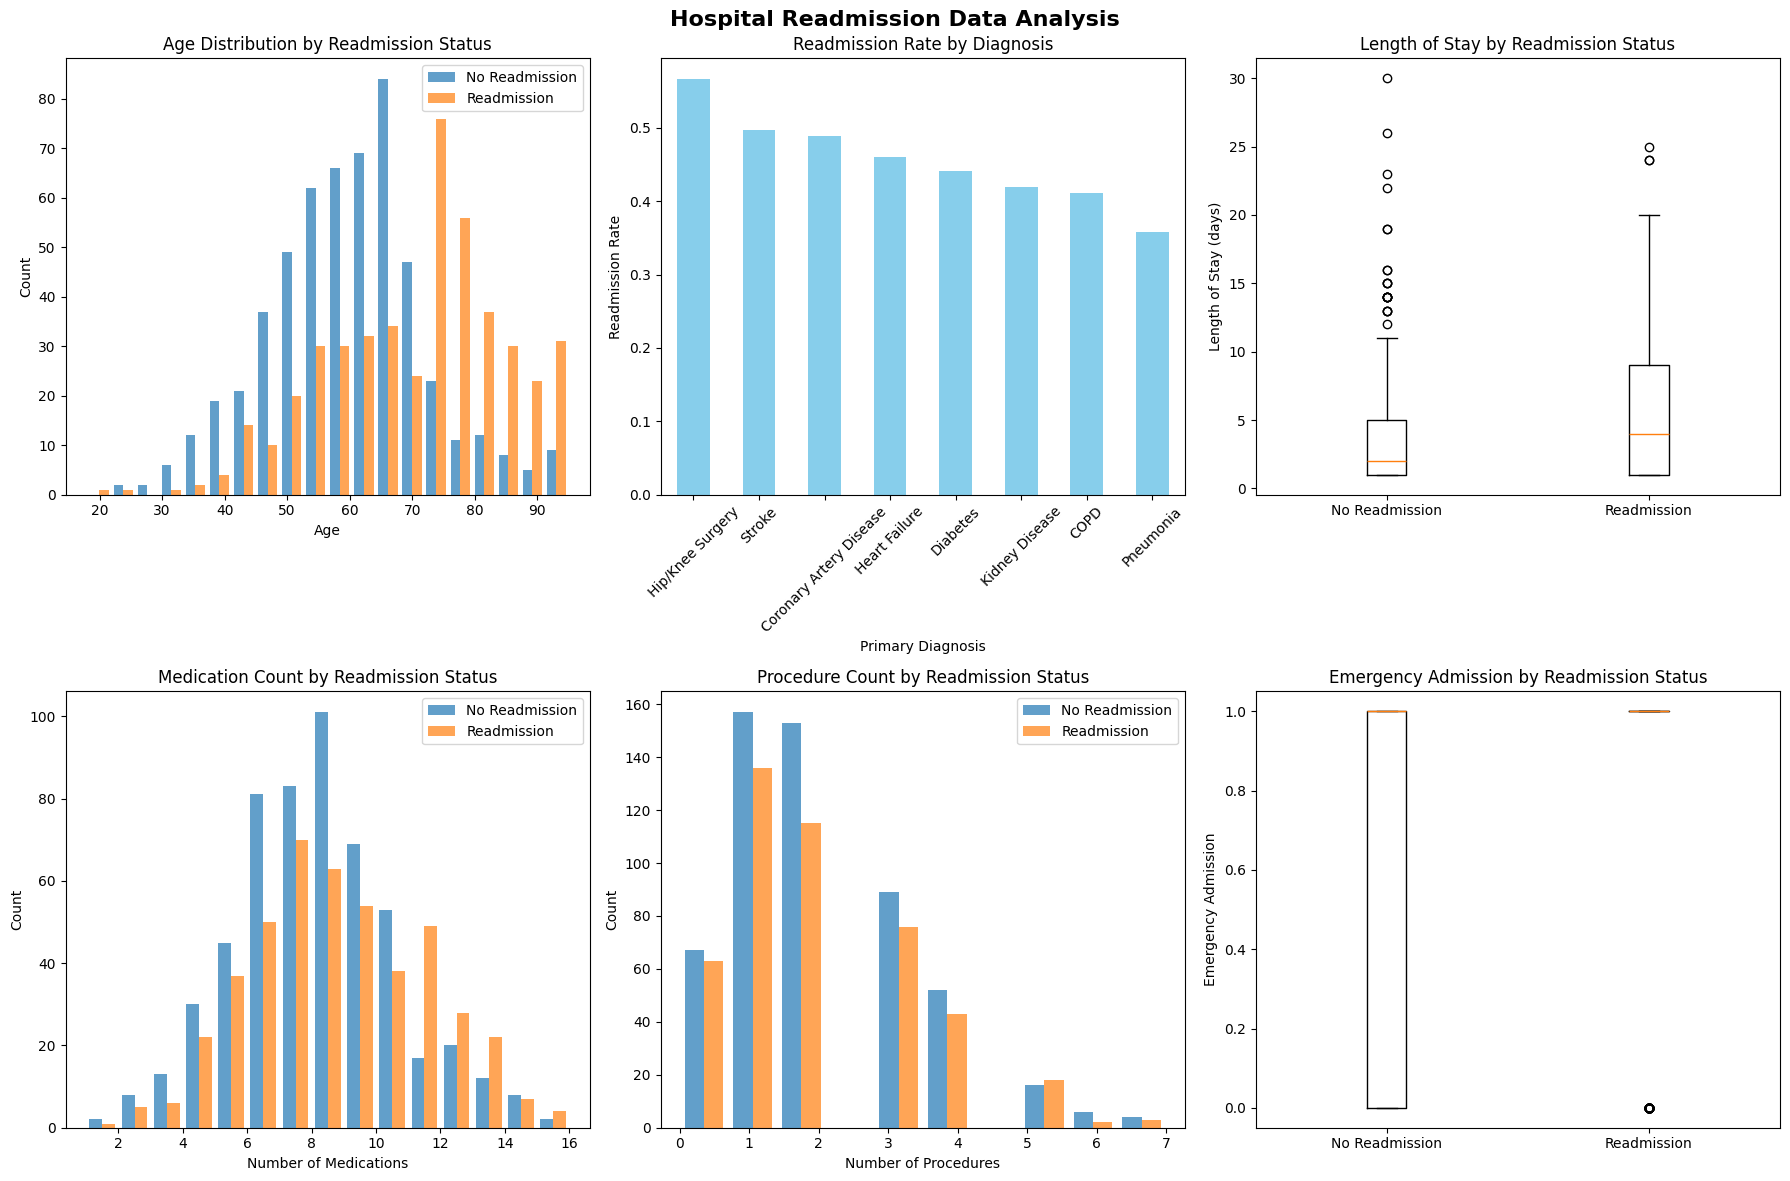

In [9]:
from exploration import data_exploration_plots
import importlib
importlib.reload(data_exploration_plots)

data_exploration_plots.plot_exploration_graphs(df_hospital_readmission)

## 4. Machine Learning Model

In [1]:
from methods import ml_model
import importlib
importlib.reload(ml_model)


# Initialize and train the model
print("Training machine learning model...")
predictor = ml_model.HospitalReadmissionPredictor()

# Preprocess the data
X, y = predictor.preprocess_data(df_hospital_readmission)
X_test, y_test, y_pred, y_pred_proba = predictor.train_model(X, y, 'random_forest')

print("Model training completed!")

Training machine learning model...


NameError: name 'df_hospital_readmission' is not defined

## 5. Model Evaluation

=== Model Evaluation ===
Accuracy: 0.875
ROC AUC Score: 0.947

=== Classification Report ===
                precision    recall  f1-score   support

No Readmission       0.90      0.87      0.88       109
   Readmission       0.85      0.88      0.86        91

      accuracy                           0.88       200
     macro avg       0.87      0.88      0.87       200
  weighted avg       0.88      0.88      0.88       200


=== Confusion Matrix ===
[[95 14]
 [11 80]]


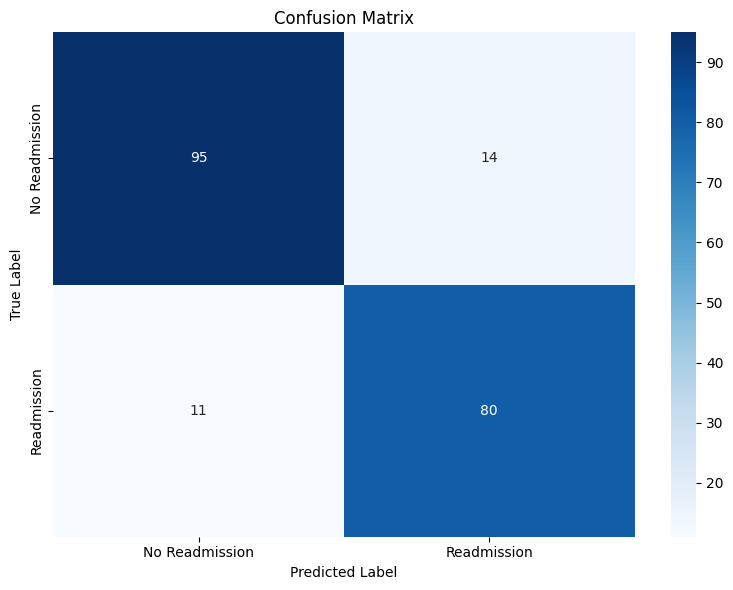

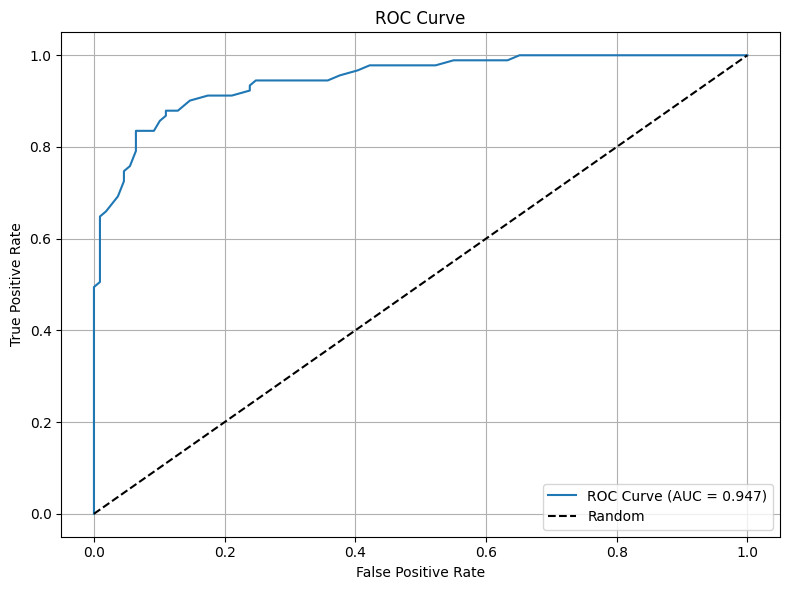

In [15]:
# Evaluate model
predictor.evaluate_model(X_test, y_test, y_pred, y_pred_proba)

## 6. Feature Importance Analysis


=== Feature Importance ===
                  feature  importance
0                     age    0.233455
8   prev_hospitalizations    0.103394
3          length_of_stay    0.098295
11             hemoglobin    0.078591
9      chronic_conditions    0.074384
13                glucose    0.071174
12             creatinine    0.068370
4         num_medications    0.063825
6     emergency_admission    0.050456
10  discharge_destination    0.048381
2       primary_diagnosis    0.039727
5          num_procedures    0.033886
7          insurance_type    0.024097
1                  gender    0.011965


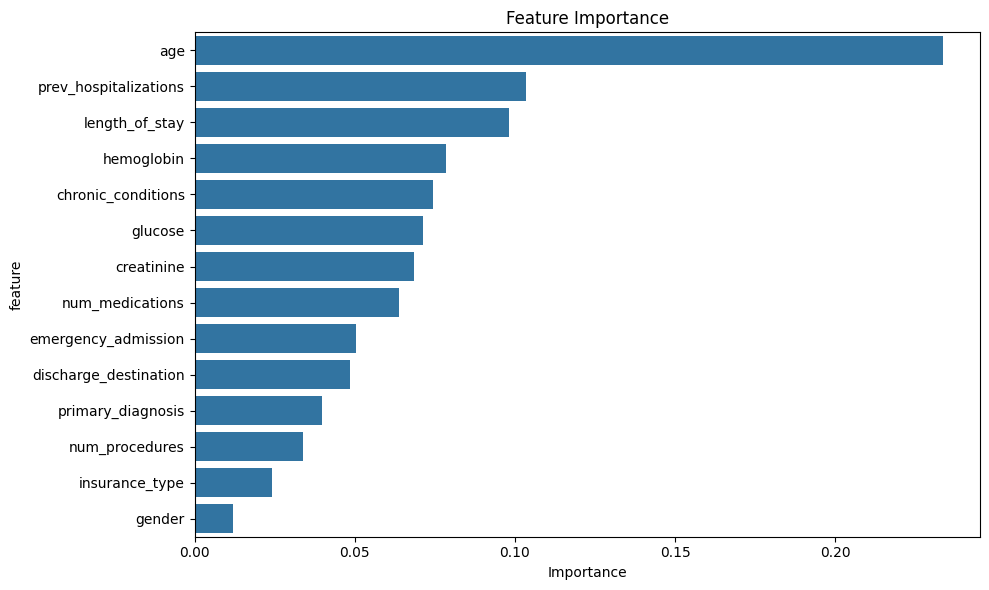

In [12]:
# Show feature importance
predictor.feature_importance()

## 7. Patient Risk Assessment with scenarios

In [16]:
# Type of patients & their risk level scenarios
print("Patient Risk Assessment Examples")
print("=" * 50)

# High-risk patient
high_risk_patient = {
    'age': 75,
    'gender': 'Male',
    'primary_diagnosis': 'Heart Failure',
    'length_of_stay': 8,
    'num_medications': 12,
    'num_procedures': 2,
    'emergency_admission': 1,
    'insurance_type': 'Medicare',
    'prev_hospitalizations': 3,
    'chronic_conditions': 4,
    'discharge_destination': 'Home',
    'hemoglobin': 9.5,
    'creatinine': 2.5,
    'glucose': 180
}

# Low-risk patient 
low_risk_patient = {
    'age': 45,
    'gender': 'Female',
    'primary_diagnosis': 'Hip/Knee Surgery',
    'length_of_stay': 3,
    'num_medications': 4,
    'num_procedures': 1,
    'emergency_admission': 0,
    'insurance_type': 'Private',
    'prev_hospitalizations': 0,
    'chronic_conditions': 1,
    'discharge_destination': 'Home',
    'hemoglobin': 13.5,
    'creatinine': 0.9,
    'glucose': 110
}

# Test high-risk patient
prediction1, probability1 = predictor.predict_new_patient(high_risk_patient)
print(f"\n HIGH-RISK PATIENT EXAMPLE:")
print(f"   Age: {high_risk_patient['age']}, Diagnosis: {high_risk_patient['primary_diagnosis']}")
print(f"   Risk Level: {'HIGH RISK' if prediction1 == 1 else 'LOW RISK'}")
print(f"   Readmission Probability: {probability1:.1%}")

# Test low-risk patient
prediction2, probability2 = predictor.predict_new_patient(low_risk_patient)
print(f"\n LOW-RISK PATIENT EXAMPLE:")
print(f"   Age: {low_risk_patient['age']}, Diagnosis: {low_risk_patient['primary_diagnosis']}")
print(f"   Risk Level: {'HIGH RISK' if prediction2 == 1 else 'LOW RISK'}")
print(f"   Readmission Probability: {probability2:.1%}")

Patient Risk Assessment Examples

 HIGH-RISK PATIENT EXAMPLE:
   Age: 75, Diagnosis: Heart Failure
   Risk Level: HIGH RISK
   Readmission Probability: 93.0%

 LOW-RISK PATIENT EXAMPLE:
   Age: 45, Diagnosis: Hip/Knee Surgery
   Risk Level: LOW RISK
   Readmission Probability: 0.0%


## 8. Custom Patient Assessment with scenario

In [ ]:
# Custom patient assessment scenarios
custom_patient = {
    'age': 65,                    # Age (18-95)
    'gender': 'Female',           # 'Male' or 'Female'
    'primary_diagnosis': 'Diabetes',  # Options: 'Heart Failure', 'Pneumonia', 'COPD', 'Diabetes', 'Kidney Disease', 'Stroke', 'Hip/Knee Surgery', 'Coronary Artery Disease'
    'length_of_stay': 5,          # Length of stay in days (1-30)
    'num_medications': 8,         # Number of medications (1-20)
    'num_procedures': 1,          # Number of procedures (0-8)
    'emergency_admission': 0,     # Emergency admission (1=Yes, 0=No)
    'insurance_type': 'Medicare', # 'Medicare', 'Medicaid', 'Private', 'Uninsured'
    'prev_hospitalizations': 1,   # Previous hospitalizations in last year (0-10)
    'chronic_conditions': 2,      # Number of chronic conditions (0-8)
    'discharge_destination': 'Home', # 'Home', 'Skilled Nursing Facility', 'Rehabilitation', 'Hospice'
    'hemoglobin': 12.0,           # Hemoglobin level
    'creatinine': 1.2,            # Creatinine level
    'glucose': 140.0              # Glucose level
}

# Make prediction
prediction, probability = predictor.predict_new_patient(custom_patient)

# Display results
print("CUSTOM PATIENT ASSESSMENT")
print("=" * 50)
print(f"Patient Profile:")
print(f"   Age: {custom_patient['age']} years")
print(f"   Gender: {custom_patient['gender']}")
print(f"   Diagnosis: {custom_patient['primary_diagnosis']}")
print(f"   Length of Stay: {custom_patient['length_of_stay']} days")
print(f"   Medications: {custom_patient['num_medications']}")
print(f"   Emergency Admission: {'Yes' if custom_patient['emergency_admission'] else 'No'}")
print(f"   Previous Hospitalizations: {custom_patient['prev_hospitalizations']}")
print(f"   Chronic Conditions: {custom_patient['chronic_conditions']}")
print(f"   Discharge Destination: {custom_patient['discharge_destination']}")

print(f"\n RISK ASSESSMENT:")
risk_level = "HIGH RISK" if prediction == 1 else "LOW RISK"
print(f"   Risk Level: {risk_level}")
print(f"   Readmission Probability: {probability:.1%}")

if prediction == 1:
    print("\n RECOMMENDATIONS:")
    print("   1. Enhanced discharge planning")
    print("   2. Follow-up appointment within 7 days")
    print("   3. Medication reconciliation")
    print("   4. Care coordination with primary care")
    print("   5. Home health services if needed")
else:
    print("\n STANDARD CARE:")
    print("   1. Regular discharge planning")
    print("   2. Standard follow-up appointment")
    print("   3. Patient education materials")

CUSTOM PATIENT ASSESSMENT
Patient Profile:
   Age: 65 years
   Gender: Female
   Diagnosis: Diabetes
   Length of Stay: 5 days
   Medications: 8
   Emergency Admission: No
   Previous Hospitalizations: 1
   Chronic Conditions: 2
   Discharge Destination: Home

 RISK ASSESSMENT:
   Risk Level: LOW RISK
   Readmission Probability: 2.0%

 STANDARD CARE:
   1. Regular discharge planning
   2. Standard follow-up appointment
   3. Patient education materials
